In [1]:
import pandas as pd
import os

%load_ext autoreload
%autoreload 2

In [15]:
df = pd.read_csv('data/raw/BTC-2021min.csv')
df.head()

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
0,1646106180,2022-03-01 03:43:00,BTC/USD,43046.58,43046.58,43046.58,43046.58,0.000000,0.000000
1,1646106060,2022-03-01 03:41:00,BTC/USD,43018.23,43046.59,43018.23,43046.58,0.142977,6154.673021
2,1646106000,2022-03-01 03:40:00,BTC/USD,43022.24,43022.24,43016.03,43016.03,0.009230,397.037957
3,1646105940,2022-03-01 03:39:00,BTC/USD,43035.16,43035.16,42999.44,42999.44,0.820950,35300.390268
4,1646105880,2022-03-01 03:38:00,BTC/USD,43077.82,43077.82,43049.46,43049.46,0.022210,956.143143


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 610782 entries, 0 to 610781
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   unix        610782 non-null  int64  
 1   date        610782 non-null  object 
 2   symbol      610782 non-null  object 
 3   open        610782 non-null  float64
 4   high        610782 non-null  float64
 5   low         610782 non-null  float64
 6   close       610782 non-null  float64
 7   Volume BTC  610782 non-null  float64
 8   Volume USD  610782 non-null  float64
dtypes: float64(6), int64(1), object(2)
memory usage: 41.9+ MB


In [23]:
df['date'] = pd.to_datetime(df['date'])

<Axes: >

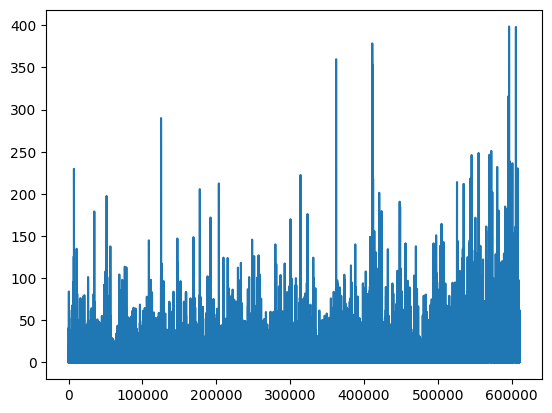

In [21]:
# plot volume
df['Volume BTC'].plot()

In [17]:
df['Volume BTC'][0]

0.0

# Delta's

In [17]:
%load_ext autoreload
%autoreload 2
from process_data import compute_log_delta

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
sample = pd.read_csv('data/processed/standard.csv', nrows=100)
sample

,date,open,high,low,close,Volume BTC
0,2017-01-01 00:01:00,966.34,966.34,966.34,966.34,7.610000
1,2017-01-01 00:02:00,966.16,966.37,966.16,966.37,8.087376
2,2017-01-01 00:03:00,966.37,966.37,966.37,966.37,0.000000
3,2017-01-01 00:04:00,966.37,966.37,966.37,966.37,0.000000
4,2017-01-01 00:05:00,966.43,966.43,966.43,966.43,0.107000
...,...,...,...,...,...,...
95,2017-01-01 01:36:00,964.15,964.15,964.15,964.15,0.036000
96,2017-01-01 01:37:00,964.05,964.05,964.05,964.05,8.000000
97,2017-01-01 01:38:00,964.05,964.05,964.05,964.05,0.000000
98,2017-01-01 01:39:00,964.05,964.05,964.05,964.05,0.000000


In [19]:
log_delta = compute_log_delta(sample)
log_delta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 1 to 99
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             99 non-null     object 
 1   open             99 non-null     float64
 2   high             99 non-null     float64
 3   low              99 non-null     float64
 4   close            99 non-null     float64
 5   Volume BTC       99 non-null     float64
 6   log_delta_open   99 non-null     float64
 7   log_delta_high   99 non-null     float64
 8   log_delta_low    99 non-null     float64
 9   log_delta_close  99 non-null     float64
dtypes: float64(9), object(1)
memory usage: 7.9+ KB


In [20]:
log_delta

,date,open,high,low,close,Volume BTC,log_delta_open,log_delta_high,log_delta_low,log_delta_close
1,2017-01-01 00:02:00,966.16,966.37,966.16,966.37,8.087376,-0.000186,0.000031,-0.000186,0.000031
2,2017-01-01 00:03:00,966.37,966.37,966.37,966.37,0.000000,0.000217,0.000000,0.000217,0.000000
3,2017-01-01 00:04:00,966.37,966.37,966.37,966.37,0.000000,0.000000,0.000000,0.000000,0.000000
4,2017-01-01 00:05:00,966.43,966.43,966.43,966.43,0.107000,0.000062,0.000062,0.000062,0.000062
5,2017-01-01 00:06:00,966.58,966.58,966.58,966.58,0.331732,0.000155,0.000155,0.000155,0.000155
...,...,...,...,...,...,...,...,...,...,...
95,2017-01-01 01:36:00,964.15,964.15,964.15,964.15,0.036000,0.000114,0.000114,0.000114,0.000114
96,2017-01-01 01:37:00,964.05,964.05,964.05,964.05,8.000000,-0.000104,-0.000104,-0.000104,-0.000104
97,2017-01-01 01:38:00,964.05,964.05,964.05,964.05,0.000000,0.000000,0.000000,0.000000,0.000000
98,2017-01-01 01:39:00,964.05,964.05,964.05,964.05,0.000000,0.000000,0.000000,0.000000,0.000000
